# Cubic Splines

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For model and evaluation
from scipy.interpolate import LSQUnivariateSpline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [10]:
# Define the data points and intervals
X = np.linspace(0, 6, 500)  # 500 points spanning [0, 6]
Y = np.cos(X)**3 + 2*np.sin(X)**2 + np.random.normal(0, 0.5, 500)  # Generate noisy data

# Split the data into training, validation, and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# Sort to ensure strictly increasing x values
sorted_indices = np.argsort(X_train)
X_train = X_train[sorted_indices]
Y_train = Y_train[sorted_indices]

# Add any other sets needed. 
X_train_val = np.concatenate((X_train, X_val))
Y_train_val = np.concatenate((Y_train, Y_val))

sorted_indices = np.argsort(X_train_val)
X_train_val = X_train_val[sorted_indices]
Y_train_val = Y_train_val[sorted_indices]



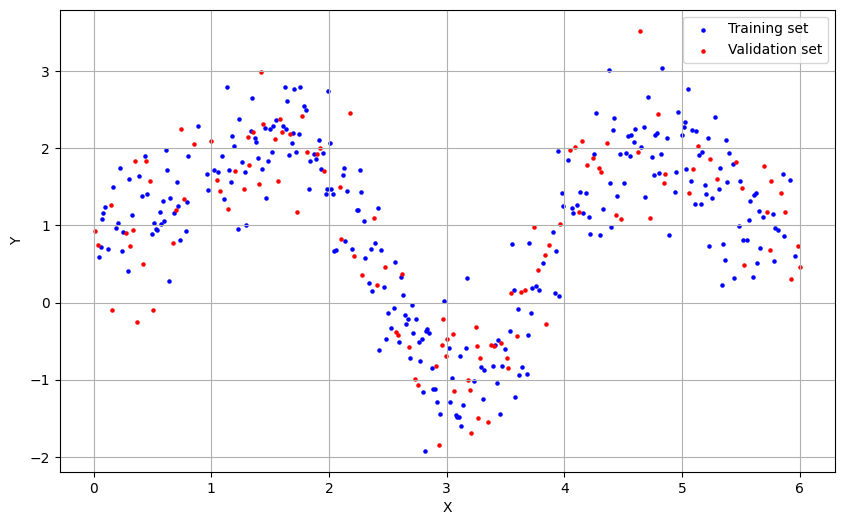

In [14]:
# Plot training and validation sets
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Training set', color='blue', s=5)
plt.scatter(X_val, Y_val, label='Validation set', color='red', s=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Data set")
plt.grid(True)
plt.legend()
plt.show()

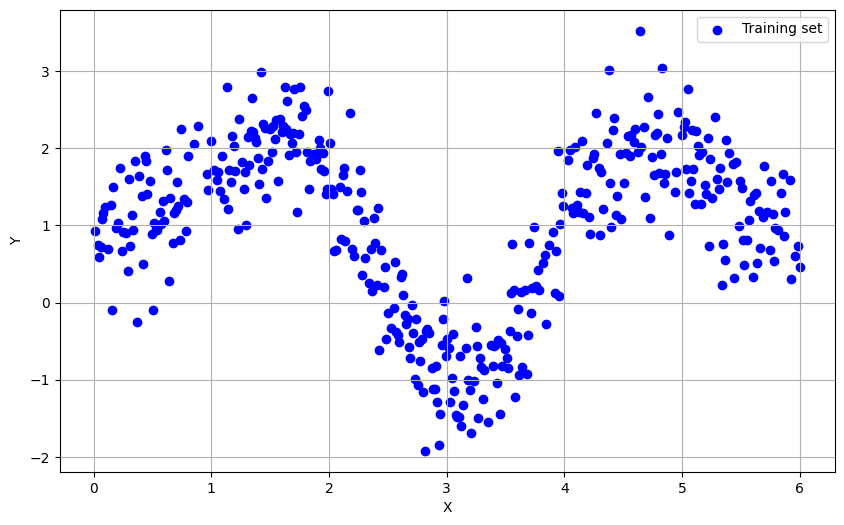

In [13]:
# Plot training and validation sets
plt.figure(figsize=(10, 6))
plt.scatter(X_train_val, Y_train_val, label='Training set', color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

In [104]:
# Write a function that generates sets of knots to consider. 
def generate_random_knots_list(dataset):
    X = np.sort(dataset)
    max = X[-1]
    min = X[0]
    
    # Now we will choose a number between 2 and 8 to select knots
    num_knots = np.random.randint(2, 8)
    
    possible_knots = [x for x in X if x > min and x < max]
    return np.sort(np.random.choice(possible_knots, num_knots, replace=False))    


In [105]:
# Generate a search space
case_num = 100
cases = []

for _ in range(case_num):
    cases.append(generate_random_knots_list(X_train))

In [109]:
# Perform a search through the cases of potential knot sequences; score with mse and r2. 
# Pick the knots with the lowest MSE
# Fit the cubic spline model
mse_list = []
r2_score_list = []

for knots in cases:
    model = LSQUnivariateSpline(X_train, Y_train, t=knots)

    # Now, you can use `model` to predict values or evaluate the model
    # For example, to predict at new points:
    Y_pred = model(X_val)
    # Calculate metrics on the testing set
    mse = mean_squared_error(Y_pred, Y_val)
    r2 = r2_score(Y_pred, Y_val)
    
    mse_list.append(mse)
    r2_score_list.append(r2)
    # Display metrics
    # print(f"Mean Squared Error (MSE): {mse:.4f}")
    # print(f"R-squared (R2): {r2:.4f}")


arg_num = np.argmin(mse_list)
best_knots = cases[arg_num]
mse_min = mse_list[arg_num]
r2_score_min = r2_score_list[arg_num]


In [110]:
# # Perform a search through the cases of potential knot sequences; score with mse and r2. 
# # Pick the knots with the lowest MSE
# # Fit the cubic spline model
# mse_list = []
# r2_score_list = []

# for knots in case_num:
#     model = LSQUnivariateSpline(X_train, Y_train, t=knots)

#     # Now, you can use `model` to predict values or evaluate the model
#     # For example, to predict at new points:
#     Y_pred = model(X_val)
#     # Calculate metrics on the testing set
#     mse = mean_squared_error(Y_pred, Y_val)
#     r2 = r2_score(Y_pred, Y_val)
    
#     mse_list.append(mse)
#     r2_score_list.append(r2)
#     # Display metrics
#     # print(f"Mean Squared Error (MSE): {mse:.4f}")
#     # print(f"R-squared (R2): {r2:.4f}")

# min

# Display metrics of result
print(f"Best knots of the randomly generated cases is: {best_knots}")
print(f"Mean Squared Error (MSE) of best knots: {mse_min:.4f}")
print(f"R-squared (R2) of best knots: {r2_score_min:.4f}")

Best knots of the randomly generated cases is: [1.17835671 1.8757515  2.05611222 2.15230461 2.87374749 3.90781563]
Mean Squared Error (MSE) of best knots: 0.2743
R-squared (R2) of best knots: 0.7529


In [128]:
# Fit the final cubic spline model with chosen knots 
knots = np.array([2.05611222, 2.87374749])

model = LSQUnivariateSpline(X_train, Y_train, t=knots)
X_new = np.linspace(0, 6, 250)
Y_pred_new = model(X_new)

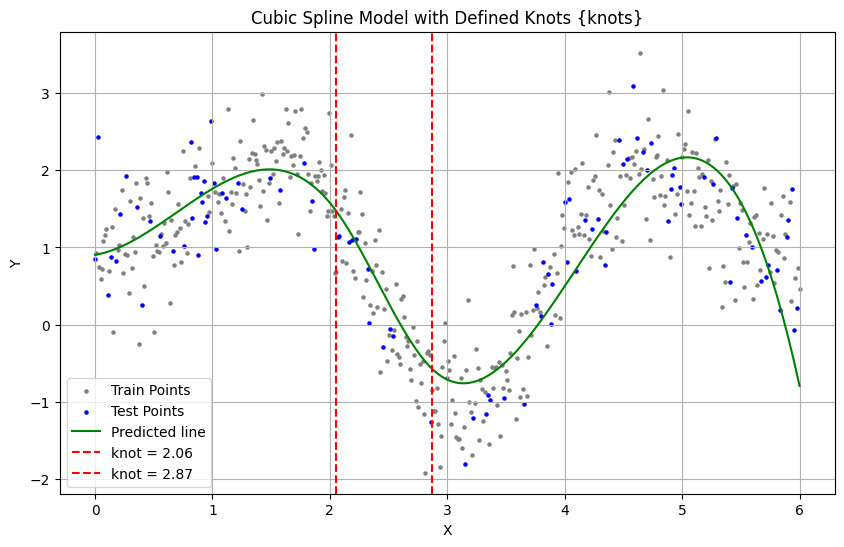

In [129]:
# Plot the estimated model, the location of the knots, the true model, and all three sets of data.

# Plot the original data and the cubic spline interpolation
plt.figure(figsize=(10, 6))
plt.scatter(X_train_val, Y_train_val, label='Train Points', color='gray', s=5)
plt.scatter(X_test, Y_test, label='Test Points', color='blue', s=5)
plt.plot(X_new, Y_pred_new, label='Predicted line', color='green')
for k in knots:
    plt.axvline(x=k, color='red', linestyle='--', label=f'knot = {round(k, 2)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Cubic Spline Model with Defined Knots {knots}')
plt.grid(True)
plt.show()


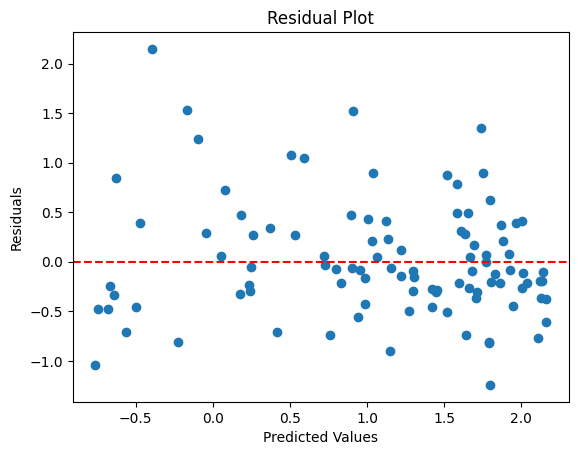

In [130]:
#Plot the residuals
Y_test_pred = model(X_test)

residuals = Y_test - Y_test_pred

# Plotting the residuals
plt.scatter(Y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()

## Write Up 

Write a blurb describing your work above. 